In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [17]:
X , y_true = make_blobs(n_samples=500  , centers=3 , cluster_std=0.60 , random_state=42)

In [18]:
df = pd.DataFrame(X , columns=['Feature-1' , 'Feature-2'])
df

,Feature-1,Feature-2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [20]:
inertia = [] #wcss
k_range = range(1,11)


In [21]:
for k in k_range:
    kmeans= KMeans(n_clusters=k ,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\ashif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ashif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ashif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ashif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [22]:
inertia

[1000.0,
 297.8954141051723,
 11.57548472310498,
 9.752067977356841,
 8.257175272446284,
 6.9175773204168,
 6.334755391595291,
 5.704177177901429,
 5.060234133532076,
 4.762361898130396]

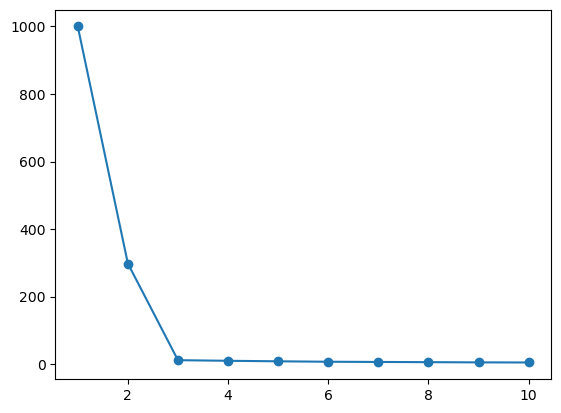

In [25]:
plt.plot(k_range , inertia , marker='o')

In [26]:
k_means_final = KMeans(n_clusters=3 , random_state=42)

In [27]:
cluster_labels = k_means_final.fit_predict(X_scaled)

c:\Users\ashif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [28]:
df["cluster"] = cluster_labels

<Axes: xlabel='Feature-1', ylabel='Feature-2'>

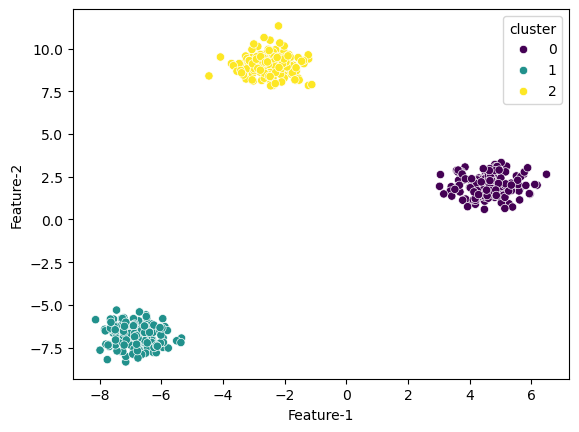

In [29]:
sns.scatterplot(x=df["Feature-1"],
                y=df["Feature-2"],
                hue=df["cluster"],
                palette="viridis")

In [30]:
from sklearn.datasets import make_moons

In [31]:
X , y_true = make_moons(n_samples=500 , noise=0.05 , random_state=42)

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
df = pd.DataFrame(X , columns=["Feature-1" , "Feature-2"])

In [34]:
X_scaled = scaler.fit_transform(df)

In [35]:
k_means = KMeans(n_clusters=2 , random_state=42)
k_labels = k_means.fit_predict(X_scaled)

c:\Users\ashif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [37]:
df["k_means"] = k_labels

<Axes: xlabel='Feature-1', ylabel='Feature-2'>

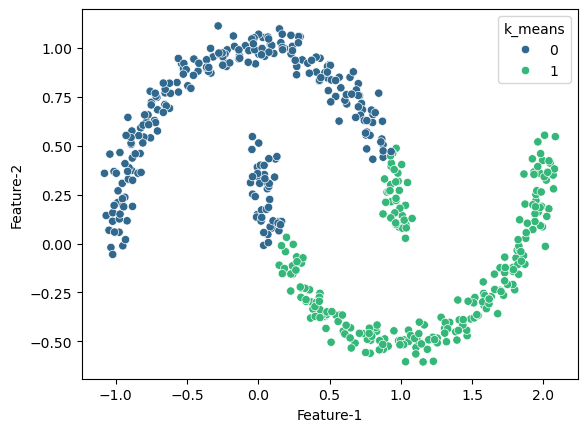

In [39]:
sns.scatterplot(x=df["Feature-1"],
                y=df["Feature-2"],
                hue=df["k_means"],
                palette="viridis")

In [40]:
db_scan = DBSCAN(eps=0.3 , min_samples=3)
db_labels = db_scan.fit_predict(X_scaled)

In [41]:
df["db_scan"] = db_labels

<Axes: xlabel='Feature-1', ylabel='Feature-2'>

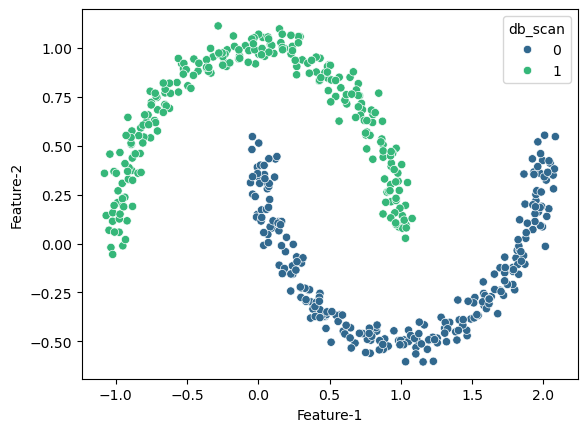

In [42]:
sns.scatterplot(x=df["Feature-1"],
                y=df["Feature-2"],
                hue=df["db_scan"],
                palette="viridis")